In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

## Loading the dataframe

In [2]:
df = pd.read_csv('https://www.dropbox.com/s/ir6bka4nrysnrge/PlanariaUpdated.csv?dl=1')

# Groupby and agg

Groupby together with apply allows you to aggregate data, much the same as you would in an excel pivot table but with a lot more flexibility.

Groupby by itself does not do anything other than internally change the way that the data is accessed. It is only when you apply a function to the grouped data that you get a result.

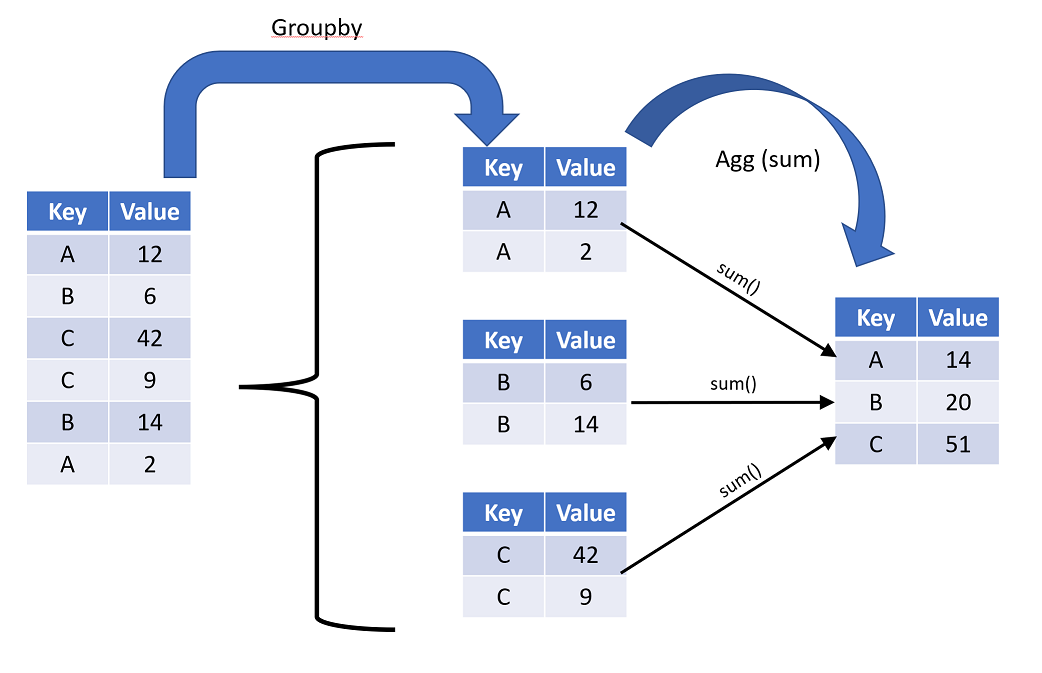


In [3]:
agged_df = df.groupby(['Primary name']).agg(len)
agged_df

,Unnamed: 0,File,Area,TUNEL,H3p,Batch,Plate,Well,Object,Slide No.,secondary name,RNAi,Time
Primary name,,,,,,,,,,,,,
Agat-1 RNAi 2dpa,20,20,20,20,20,20,20,20,20,20,20,20,20
Agat-1 RNAi 4dpa,17,17,17,17,17,17,17,17,17,17,17,17,17
Agat-1 RNAi 10dpf,10,10,10,10,10,10,10,10,10,10,10,10,10
Agat-1 RNAi 5dpf,10,10,10,10,10,10,10,10,10,10,10,10,10
Agat-1 RNAi 6hpa,20,20,20,20,20,20,20,20,20,20,20,20,20
Agat-1 RNAi 7dpf,10,10,10,10,10,10,10,10,10,10,10,10,10
Agat-2 RNAi 2dpa,19,19,19,19,19,19,19,19,19,19,19,19,19
Agat-2 RNAi 4dpa,18,18,18,18,18,18,18,18,18,18,18,18,18
Agat-2 RNAi 10dpf,10,10,10,10,10,10,10,10,10,10,10,10,10


What did this do?  It went through our dataframe, and found all the unique values in 'Primary name', and then for each of those unique values it created a new dataframe with only the rows that had that value in 'Primary name'.  It then applied the function "len" to that new dataframe, and returned the result.  Len tells us how many image files correspond to each Primary name, but that is not very useful, we actually want the median value for TUNEL and H3p, but this is useful as it tells us how many worm images are associated with each Primary name.

The agg() function can take a dictionary, where the keys are column names and the values are functions to apply to those columns.  We can use this to get the median value for each column.

In [4]:
agged_df = df.groupby(['Primary name']).agg({'TUNEL':np.median, 'H3p':np.median}).reset_index()
agged_df

,Primary name,TUNEL,H3p
0,Agat-1 RNAi 2dpa,318.490224,514.554913
1,Agat-1 RNAi 4dpa,598.407492,436.325516
2,Agat-1 RNAi 10dpf,235.670511,218.239248
3,Agat-1 RNAi 5dpf,447.672115,273.950983
4,Agat-1 RNAi 6hpa,180.772034,287.642109
5,Agat-1 RNAi 7dpf,244.173856,240.812105
6,Agat-2 RNAi 2dpa,357.519229,206.363454
7,Agat-2 RNAi 4dpa,904.654898,288.142694
8,Agat-2 RNAi 10dpf,326.926954,165.742438
9,Agat-2 RNAi 5dpf,258.415644,205.407307


Whenever a groupby/agg operation is used, we almost always tack .reset_index() onto the end so that pandas does not make stupid multi-level column names.

This is not as much use as what we really want for this experiment:  broken down by treatment, and then by timepoint.  We can do this by passing a list of column names to groupby:

In [5]:
agged_df = df.groupby(['RNAi', 'Time']).agg({'TUNEL':np.median, 'H3p':np.median}).reset_index()
agged_df

,RNAi,Time,TUNEL,H3p
0,Agat-1,10dpf,235.670511,218.239248
1,Agat-1,2dpa,318.490224,514.554913
2,Agat-1,4dpa,598.407492,436.325516
3,Agat-1,5dpf,447.672115,273.950983
4,Agat-1,6hpa,180.772034,287.642109
5,Agat-1,7dpf,244.173856,240.812105
6,Agat-2,10dpf,326.926954,165.742438
7,Agat-2,2dpa,357.519229,206.363454
8,Agat-2,4dpa,904.654898,288.142694
9,Agat-2,5dpf,258.415644,205.407307


# Simple plotting of results using seaborn

Now that we have the data aggregated, let's focus on just one time point:  5 days post feeding

<AxesSubplot: xlabel='RNAi', ylabel='TUNEL'>

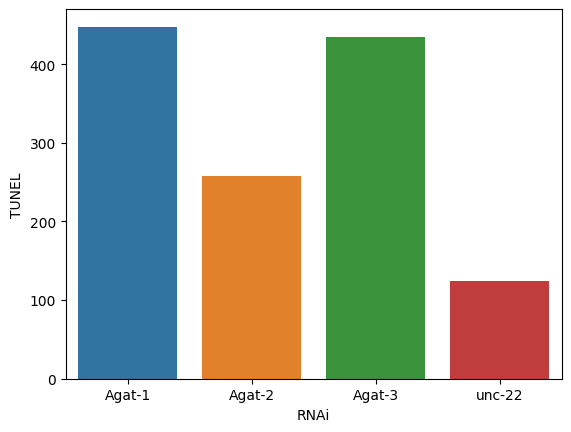

In [6]:
dpf5_df = agged_df[agged_df['Time']=='5dpf']
sns.barplot(data=dpf5_df, x='RNAi', y='TUNEL')

We want the unc-22 to be on the left so we use the order parameter in seaborn plots.

Text(0.5, 1.0, 'Median TUNEL density at 5dpf')

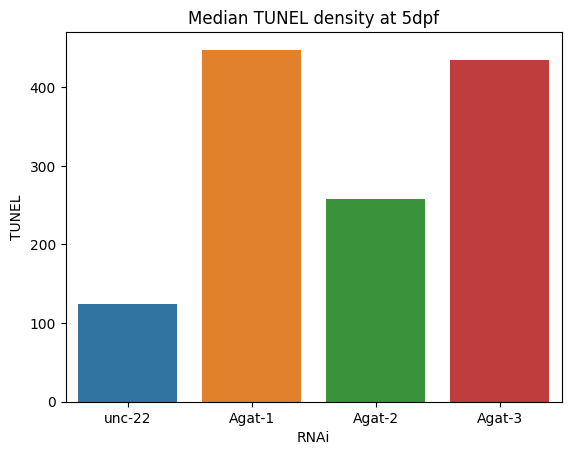

In [7]:
sns.barplot(data=dpf5_df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'])
plt.title('Median TUNEL density at 5dpf')

But this is just at 5dpf, nothing stops us from plotting all of the time points together, we can use color (hue) in order to distinguish the different time points

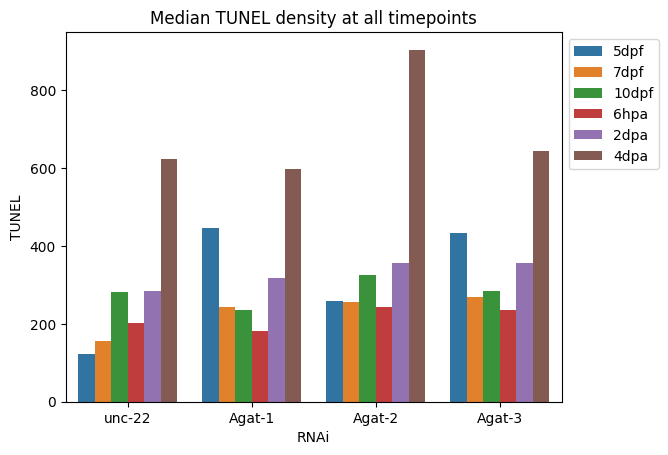

In [8]:
sns.barplot(data=agged_df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'])
plt.title('Median TUNEL density at all timepoints')
plt.legend(bbox_to_anchor=(1,1))

# Statistical plots in seaborn

The REAL beauty of seaborn and plotly is that we can even take a step further back, and include ALL of the original data points in statistical plots, note we are going back to the original df now, we did not really even need to aggregate in this case!

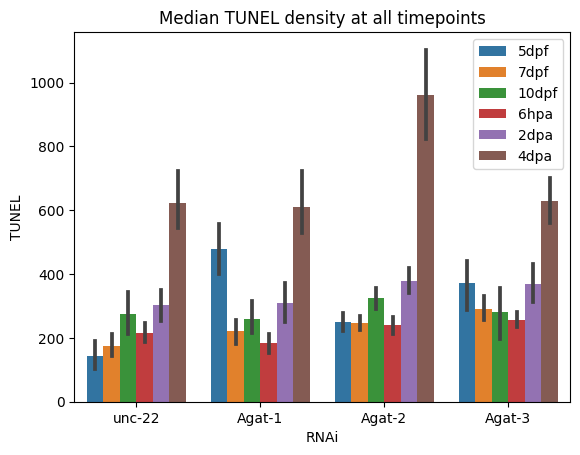

In [9]:
sns.barplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'])
plt.title('Median TUNEL density at all timepoints')
plt.legend(bbox_to_anchor=(1,1))

Seaborn recognizes that there are multiple datapoints in the table that correspond to unc-22, 5dpf, and plots the mean and the 95% confidence interval.  

Alternatively we can do a boxplot.

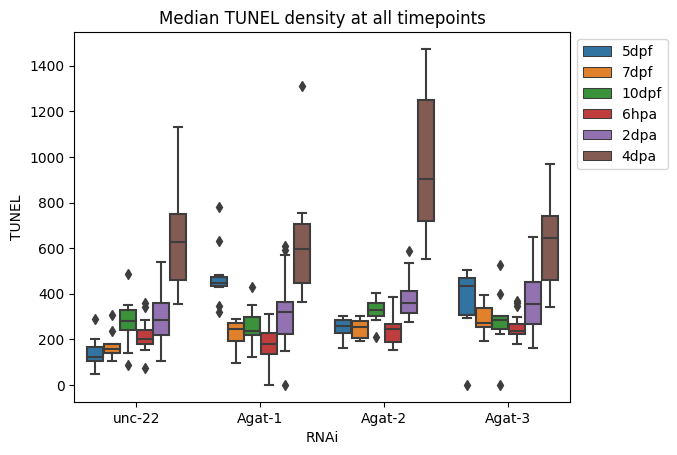

In [10]:
sns.boxplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'])
plt.title('Median TUNEL density at all timepoints')
plt.legend(bbox_to_anchor=(1,1))

Or we can stack two graphs on top of each other: I like using the box and the strip plot

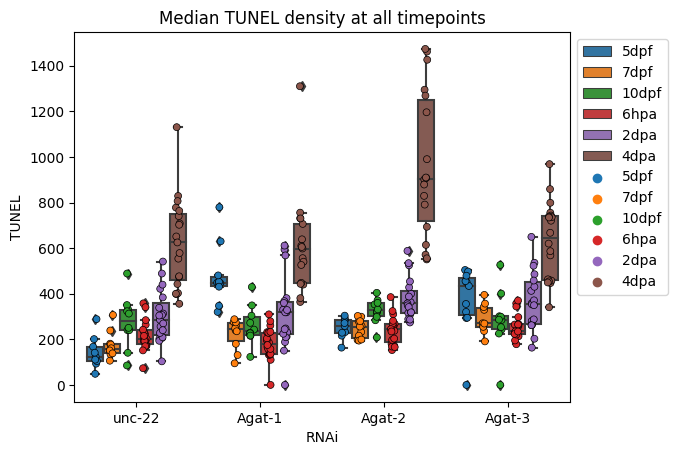

In [11]:
sns.boxplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'])
sns.stripplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'], dodge=True, linewidth=0.5, edgecolor='black')
plt.title('Median TUNEL density at all timepoints')
plt.legend(bbox_to_anchor=(1,1))

Seaborn plots play nicely with matplotlib, so you can use them in the same way as you would use matplotlib plots.

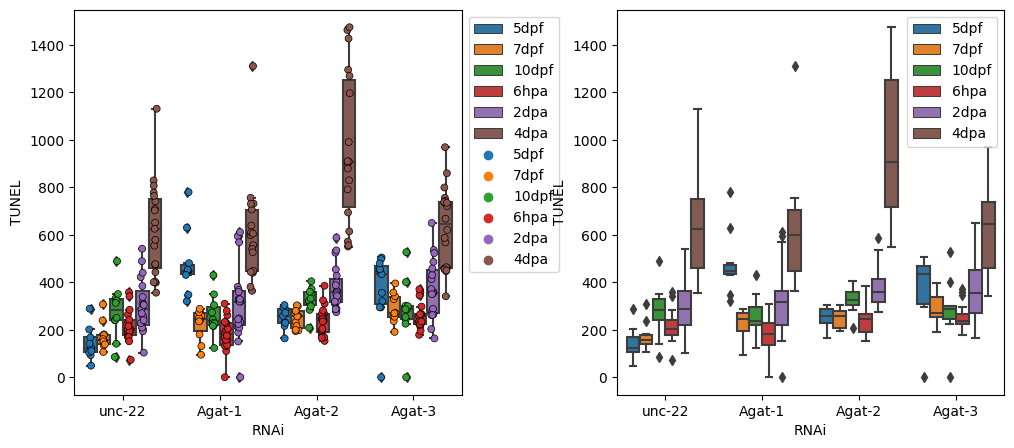

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'wspace': 0.4})


sns.boxplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'], ax=axs[0])
sns.stripplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'], dodge=True, linewidth=0.5, edgecolor='black', ax=axs[0])
plt.subplot(1,2,1)
plt.legend(bbox_to_anchor=(1,1))


sns.boxplot(data=df, x='RNAi', y='TUNEL', order=['unc-22', 'Agat-1', 'Agat-2', 'Agat-3'], hue='Time', hue_order=['5dpf', '7dpf', '10dpf', '6hpa', '2dpa', '4dpa'], ax=axs[1])
plt.subplot(1,2,2)
plt.legend(bbox_to_anchor=(1,1))

plt.savefig('TUNEL.pdf', dpi=300)

### Test knowledge

Your PI hates box plots, they want you to make a violin plot instead.  They also want all of the 5dpfs together, and the 7dpfs together etc.  How would you do this?

Seaborn has a variety of really awesome plotting functions, and they are all very similar in style to these examples in that they take a dataframe as an argument, and you simply provide the columns for the X/Y/Color/Facet etc.  I highly recommend checking out the seaborn gallery for more examples:  https://seaborn.pydata.org/examples/index.html

Sometimes the customizability of seaborn is really necessary for making a figure for a paper, but most of the time I am exploring data, and for that I prefer my favorite plotting package that I almost use exclusively:  plotly.

# Plotly

Let's go back to our 5k corporate challenge data, where each runner has a unique time (minutes) and name, but belongs to multiple broader categories:  M/F, Age group, Division, and Company.

In [13]:
kccdf = pd.read_csv('https://www.dropbox.com/s/h3qzdm0hrltfaaw/kccc5k.csv?dl=1')
kccdf = kccdf.drop(columns=['Unnamed: 0', 'Time', 'minutes2', 'k_pace', 'mile_pace'])
kccdf

,Place,Last Name,First Name,Company,Div,Div Points,Medal Points,gender,age,minutes,Full Name
0,1,Foster,Jason,Sprint,A,10,3,M,20,18.013333,Jason Foster
1,2,Lawson,Matthew,PwC,F,10,2,M,20,18.465000,Matthew Lawson
2,3,Kaiser,Andy,MHC (Murphy-Hoffman Company),D,10,1,M,20,18.985000,Andy Kaiser
3,4,Salisbury,Luke,Black & Veatch,A,8,0,M,20,19.156667,Luke Salisbury
4,5,De Paz,Josue,Commerce Bank,A,6,0,M,20,19.323333,Josue De Paz
...,...,...,...,...,...,...,...,...,...,...,...
3002,12,Erdmann,Ann,NorthPoint Development,F,10,0,W,70,56.433333,Ann Erdmann
3003,13,Hodge,Shannon,SelectQuote Insurance Services,C,8,0,W,70,58.121667,Shannon Hodge
3004,14,Riepenkroger,Karen,Sprint,A,3,0,W,70,59.513333,Karen Riepenkroger
3005,15,Reid,Mary,"Design Resources, Inc",G,10,0,W,70,60.520000,Mary Reid


### Groupby and aggregate revisited

In principle, companies get placed into divisions because they are of a similar size and will have simiilar numbers of competitors.  Let's see if that is true.

We will groupby company, division, and gender

In [14]:
agged = kccdf.groupby(['Company', 'Div']).agg({'Last Name': 'count', 'minutes':np.mean}).reset_index().rename(columns={'Last Name':'count'})
agged.head()

,Company,Div,count,minutes
0,AMC Theatres,C,35,31.639524
1,APEX Orthopedics and Sports Medicine Team,H,25,40.772333
2,Accenture,F,9,36.565926
3,Ad Astra,H,14,33.666071
4,Affinis Corp/Zelis Healthcare,H,6,42.413889


Much like seaborn, plotly is very convenient in that you only provide the name of the dataframe you want to use, and then specify column names within that dataframe to use for the X/Y/Color/Facet etc.

In [15]:
px.box(agged, x='Div', y='count')

One thing you'll immediately notice is that unlike matplotlib and seaborn the graph is interactive.  You can zoom in, pan, and hover over points to get more information (see the two buttons in the top right).  This is really useful when you have a lot of data points.

Unfortunately it does not have things in the right order, let's make this a bit prettier using category_orders, category_orders is similar to the order and hue_order parameters in seaborn, but it can combine them all into one dictionary.

In [16]:
my_category_orders = {'Div': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], 'gender':['W', 'M']}

All this does is make sure that whenever we need an order to some variables on a graph, it follows this order.

We also are going to throw in the 'hover_data' argument, which lets us see the value of something we are not already plotting (in this case the Company name).  We'll throw in a title and have it show all of the points as well.

In [17]:
px.box(agged, x='Div', y='count', category_orders=my_category_orders, points='all', title='Number of Participants by Division', hover_data=['Company'])

Now you can even mouse over an individual point and see the name of the company.

You can even save it as an html file and send it to your boss, who can then open it in a browser and play with it themselves.

Alternatively you can hit the little save icon in the top right.

In [18]:
f = px.box(agged, x='Div', y='count', category_orders=my_category_orders, points='all', title='Number of Participants by Division', hover_data=['Company'])
f.write_image('DivisionParticipation.png', width=800, height=600, scale=2)
f.write_html('DivisionParticipation.html')
f

### Test knowledge

Let's have you remake the participants by division plot, but this time with just a gender of your choosing.  You will need to remake the agged dataframe and then plot.

## Beyond 2 dimensions

Plotly has the ability to embed more than 2 categories as extra plotting dimensions.  These are:

Facets, Color, Size, Animation Frame

Let's make a new aggregated dataframe which looks at average 5k time by company/division/gender

In [19]:
agged_cdg = kccdf.groupby(['Company', 'Div', 'gender']).agg({'Last Name': 'count', 'minutes':np.mean}).reset_index().rename(columns={'Last Name':'count'})
agged_cdg.head()

,Company,Div,gender,count,minutes
0,AMC Theatres,C,M,18,29.545370
1,AMC Theatres,C,W,17,33.856863
2,APEX Orthopedics and Sports Medicine Team,H,M,8,33.954583
3,APEX Orthopedics and Sports Medicine Team,H,W,17,43.980686
4,Accenture,F,M,6,33.127222


In [20]:
px.box(agged_cdg, x='Div', y='minutes', color='gender', category_orders=my_category_orders, points='all', hover_data=['Company'],  title='COLOR:  Average time by Division (gender in color)')

In [21]:
px.box(agged_cdg, x='Div', y='minutes', facet_col='gender', category_orders=my_category_orders, points='all', hover_data=['Company'],  title='FACET:  Average time by Division (gender in facet)')

In [22]:
px.scatter(agged_cdg, x='Div', y='minutes', category_orders=my_category_orders, hover_data=['Company'],  title='SIZE: Average time by Division (participant count in size)', size='count', size_max=15, height=600)

Let's reaggregate, this time on Div, gender, and age instead of company

In [23]:
agged_dga = kccdf.groupby(['Div', 'gender', 'age']).agg({'Last Name': 'count', 'minutes':np.mean}).reset_index().rename(columns={'Last Name':'count'})
agged_dga.head()

,Div,gender,age,count,minutes
0,A,M,20,17,21.654804
1,A,M,25,25,24.139133
2,A,M,30,27,22.787531
3,A,M,35,22,23.725303
4,A,M,40,23,21.636232


In [24]:
px.scatter(agged_dga, x='Div', y='minutes', category_orders=my_category_orders, color='gender',
           title='ANIMATION:  Average time by Division (participant count in size)', size='count', size_max=25, animation_frame='age', height=600, range_y=[10, 65])

### Test knowledge

The previous graph made it look like times got worse with age, make a new agged_ag that finds the median "minutes" for each age/gender combination, and then plot it in a useful way using plotly.

## Other plots

In [25]:
px.violin(kccdf, x='age', y='minutes', color='gender', title='KCCC 5K Times', points='all', hover_data=['Full Name', 'minutes'], category_orders=my_category_orders,height=600)

In [26]:
px.box(kccdf[kccdf['Div']=='D'], x='Company', y='minutes', points='all', hover_data=['Full Name'], title='KCCC 5K Times by Company for Division D', height=600, color='gender', category_orders=my_category_orders)

# Pivot and melt

## Pivot

### Look at relationship between male and female performance within a company

In [27]:
mw_df = kccdf.groupby(['Company', 'gender']).agg({'minutes':np.median}).reset_index()
mw_df

,Company,gender,minutes
0,AMC Theatres,M,25.810000
1,AMC Theatres,W,30.321667
2,APEX Orthopedics and Sports Medicine Team,M,28.569167
3,APEX Orthopedics and Sports Medicine Team,W,43.250000
4,Accenture,M,34.432500
...,...,...,...
409,"eSolutions, Inc.",W,35.535000
410,iModules,M,24.745000
411,iModules,W,44.464167
412,nbkc bank,M,23.053333


In [28]:
pivoted_df = mw_df.pivot(index='Company', columns='gender', values='minutes').reset_index()
pivoted_df

gender,Company,M,W
0,AMC Theatres,25.810000,30.321667
1,APEX Orthopedics and Sports Medicine Team,28.569167,43.250000
2,Accenture,34.432500,39.458333
3,Ad Astra,25.336667,33.920000
4,Affinis Corp/Zelis Healthcare,28.421667,39.993333
...,...,...,...
209,Zillow Home Loans,20.360000,38.630000
210,Zurich,28.940833,34.583333
211,"eSolutions, Inc.",32.105000,35.535000
212,iModules,24.745000,44.464167


Note that now the times for men and times for women are getting their own column.  This lets us do some quick statistics on the data.

In [29]:
pivoted_df.corr()

C:\Users\smc\AppData\Local\Temp\ipykernel_15396\1191563689.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



gender,M,W
gender,,
M,1.000000,0.378887
W,0.378887,1.000000


Only a .37 correlation between the relative performance of men and women at the same company.

### Look at relationship between male and female performance within age group

In [30]:
mw_df = kccdf.groupby(['age', 'gender']).agg({'minutes':np.median}).reset_index().sort_values('minutes', ascending=True)
pivoted_df = mw_df.pivot(index='age', columns='gender', values='minutes').reset_index()
pivoted_df['age'] = pivoted_df['age'].astype(str)
pivoted_df

gender,age,M,W
0,20,24.750000,31.451667
1,25,24.955000,31.186667
2,30,25.316667,32.862500
3,35,25.710000,33.525000
4,40,26.138333,34.928333
5,45,26.325833,38.029167
6,50,27.803333,40.840833
7,55,29.520000,40.471667
8,60,30.895833,46.425000
9,65,36.095000,42.368333


In [31]:
pivoted_df.corr()

C:\Users\smc\AppData\Local\Temp\ipykernel_15396\1191563689.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



gender,M,W
gender,,
M,1.000000,0.844879
W,0.844879,1.000000


Unsurprisingly women/men's performance are quite correlated when we look at different ages, but there is not a whole lot of correlation within a company.

## Melt

The opposite of pivot is melt:  it takes the column names and turns them into values in a single column.  Our table gets twice as long but half as wide.

In [32]:
pivoted_df.head()

gender,age,M,W
0,20,24.750000,31.451667
1,25,24.955000,31.186667
2,30,25.316667,32.862500
3,35,25.710000,33.525000
4,40,26.138333,34.928333


In [33]:
pivoted_df.melt(id_vars='age', value_vars=['W', 'M'], value_name='minutes')

,age,gender,minutes
0,20,W,31.451667
1,25,W,31.186667
2,30,W,32.862500
3,35,W,33.525000
4,40,W,34.928333
5,45,W,38.029167
6,50,W,40.840833
7,55,W,40.471667
8,60,W,46.425000
9,65,W,42.368333


# Error bars

What if we want to look at the error bars as well as the median values for the age distribution?  We can use the 'error_y' parameter to do this.

In [34]:
agged = kccdf.groupby(['gender', 'age']).agg({'minutes':[np.median, stats.sem]}).reset_index()
agged.columns = ['gender', 'age', 'median', 'sem']
px.line(agged, x='age', y='median', error_y='sem', color='gender')

In [35]:
agged = kccdf.groupby(['gender', 'age', 'Div']).agg({'minutes':[np.median, stats.sem]}).reset_index()
agged.columns = ['gender', 'age', 'Div', 'median', 'sem']
px.line(agged, x='age', y='median', color='gender', error_y='sem', facet_col='Div', facet_col_wrap=3, title='KCCC 5K Times', height=800)

c:\Users\smc\Miniconda3\envs\napari\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\Users\smc\Miniconda3\envs\napari\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning:

invalid value encountered in double_scalars

